In [190]:
import pandas as pd
import numpy as np
import json
import requests
from matplotlib import pyplot as plt

## CSV ##

In [160]:
#Reads in Data about college admissions
names = ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
        'LOR', 'CGPA', 'Research', 'Chance of Admit']
Data_df = pd.read_csv("C:/Users/Noah/Desktop/ECON 213/Admission_Predict.csv",
                      header=None, names=names,)

#Cleans Data of all columns that are missing any data
data_clean = Data_df.dropna(axis=0, subset = ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
        'LOR', 'CGPA', 'Research', 'Chance of Admit'], how = 'any')

#Moves the data frame to numpy so I can work with it how I know how.
data_numpy = data_clean.values
print(data_numpy)

[['Serial No.' 'GRE Score' 'TOEFL Score' ... 'CGPA' 'Research'
  'Chance of Admit ']
 ['1' '337' '118' ... '9.65' '1' '0.92']
 ['2' '324' '107' ... '8.87' '1' '0.76']
 ...
 ['398' '330' '116' ... '9.45' '1' '0.91']
 ['399' '312' '103' ... '8.78' '0' '0.67']
 ['400' '333' '117' ... '9.66' '1' '0.95']]


In [147]:
#Now I'm breaking the data into two tables that are differentiated by "Research"
data_Research=[]
data_NoResearch=[]

np.append(data_Research,data_numpy[0])
np.append(data_NoResearch,data_numpy[0])
for i in range(0,len(data_numpy)):
    if data_numpy[i][7]=='0':
        data_NoResearch.append(data_numpy[i])
    if data_numpy[i][7]=='1':
        data_Research.append(data_numpy[i])


In [148]:
#Now I want to find the average acceptance rate of Research vs. No Research

count1=0
for i in range (0,len(data_Research)):
    count1=count1+float(data_Research[i][8])
print("The average acceptance rate for applicants WITH research:", count1/(len(data_Research)))

count2=0
for i in range (0,len(data_NoResearch)):
    count2=count2+float(data_NoResearch[i][8])
print("The average acceptance rate for applicants WITHOUT research:",count2/(len(data_NoResearch)))

The average acceptance rate for applicants WITH research: 0.7959817351598172
The average acceptance rate for applicants WITHOUT research: 0.6376795580110497


We see that doing research helps ones' odds to be accepted into a school. The biggest lurking variable here is the University Rating. The reason why this is important to me is because I'm thinking about getting a PhD and I can choose to take a summer to have an intership, or just do research here on campus. It would be a good idea to find data where a comparison could be done between the two.

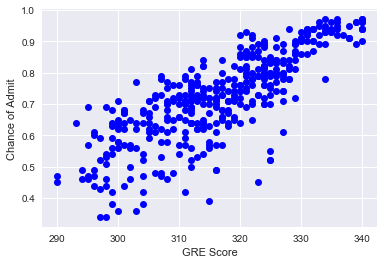

In [320]:
#Now I want to make a graph of GRE Score and Chance of Admit
for i in range (1,len(data_numpy)):
    plt.plot(float(data_numpy[i][1]),float(data_numpy[i][8]),"bo")
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.subplots_adjust(left=None, bottom = None, right = None, top = None, wspace = 1, hspace = None)
plt.show()

Yay Correlation!

In [87]:
data_research.head(25)

,0,1,2,3,4,5,6,7,8
0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
1,1,337,118,4,4.5,4.5,9.65,1,0.92
2,2,324,107,4,4,4.5,8.87,1,0.76
3,3,316,104,3,3,3.5,8,1,0.72
4,4,322,110,3,3.5,2.5,8.67,1,0.8
5,5,314,103,2,2,3,8.21,0,0.65
6,6,330,115,5,4.5,3,9.34,1,0.9
7,7,321,109,3,3,4,8.2,1,0.75
8,8,308,101,2,3,4,7.9,0,0.68
9,9,302,102,1,2,1.5,8,0,0.5


## JSON ##

The JSON file that I have is my personal online save data for a game I play called Crusaders of the Lost Idols, and it contains everything that my account communicates to the server to load my game.
The section I will be working with is titled 'heroes' (the first 126 {} things) and I will be extracting their enchantment points to see which hero has the most, the least, and what the average amount of enchantment points are. 

In [200]:
#JSON Data:
with open("C:/Users/Noah/Desktop/ECON 213/crusadersJSON.txt") as f:
    json_data = json.load(f)
json_data

{'success': True,
 'details': {'formation': [56, 8, 94, 12, 99, 51, 68, 97, 14, 62, 103, 7],
  'current_area': 597,
  'highest_area': 598,
  'normal_loot_chests': 282,
  'rare_loot_chests': 0,
  'gold': '5.319778580737368e+125',
  'heroes': [{'hero_id': 1,
    'level': 1,
    'upgrades': [],
    'health': 7,
    'grind_time': 0,
    'disenchant': 119,
    'owned': 1,
    'in_seat': 1,
    'disabled_upgrades': []},
   {'hero_id': 2,
    'level': 0,
    'upgrades': [],
    'health': 0,
    'grind_time': 0,
    'disenchant': 179,
    'owned': 1,
    'in_seat': 0,
    'disabled_upgrades': []},
   {'hero_id': 3,
    'level': 0,
    'upgrades': [],
    'health': 0,
    'grind_time': 0,
    'disenchant': 166,
    'owned': 1,
    'in_seat': 0,
    'disabled_upgrades': []},
   {'hero_id': 4,
    'level': 0,
    'upgrades': [],
    'health': 0,
    'grind_time': 0,
    'disenchant': 186,
    'owned': 1,
    'in_seat': 0,
    'disabled_upgrades': []},
   {'hero_id': 5,
    'level': 0,
    'upgrad

In [211]:
#This command first goes into the entry "details", then into the entry "heroes"
#There are multiple dictionaries per a dictionary so I need to work through them
json_data['details']['heroes']
#This leaves me a list of dictionaries

[{'hero_id': 1,
  'level': 1,
  'upgrades': [],
  'health': 7,
  'grind_time': 0,
  'disenchant': 119,
  'owned': 1,
  'in_seat': 1,
  'disabled_upgrades': []},
 {'hero_id': 2,
  'level': 0,
  'upgrades': [],
  'health': 0,
  'grind_time': 0,
  'disenchant': 179,
  'owned': 1,
  'in_seat': 0,
  'disabled_upgrades': []},
 {'hero_id': 3,
  'level': 0,
  'upgrades': [],
  'health': 0,
  'grind_time': 0,
  'disenchant': 166,
  'owned': 1,
  'in_seat': 0,
  'disabled_upgrades': []},
 {'hero_id': 4,
  'level': 0,
  'upgrades': [],
  'health': 0,
  'grind_time': 0,
  'disenchant': 186,
  'owned': 1,
  'in_seat': 0,
  'disabled_upgrades': []},
 {'hero_id': 5,
  'level': 0,
  'upgrades': [],
  'health': 0,
  'grind_time': 0,
  'disenchant': 181,
  'owned': 1,
  'in_seat': 0,
  'disabled_upgrades': []},
 {'hero_id': 6,
  'level': 0,
  'upgrades': [],
  'health': 0,
  'grind_time': 0,
  'disenchant': 91,
  'owned': 1,
  'in_seat': 0,
  'disabled_upgrades': []},
 {'hero_id': 7,
  'level': 3034,
  

In [228]:
heroes = json_data['details']['heroes']
EP=[]
for i in range(0,len(heroes)):
    EP.append(heroes[i]["disenchant"])

print(EP)
print(len(EP))

[119, 179, 166, 186, 181, 91, 75, 63, 74, 71, 259, 142, 178, 175, 174, 191, 181, 182, 213, 178, 161, 179, 213, 165, 159, 188, 70, 95, 33, 20, 179, 0, 180, 0, 0, 0, 0, 0, 0, 49, 0, 0, 57, 179, 0, 0, 0, 188, 187, 200, 165, 167, 399, 176, 166, 82, 176, 228, 94, 0, 0, 25, 187, 171, 181, 0, 168, 159, 74, 75, 27, 36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 0, 0, 0, 0, 0, 197, 0, 14, 175, 170, 43, 176, 172, 325, 144, 0, 29, 54, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 88, 0, 0, 302, 300, 408, 300, 0]
126


This data needs cleaning up. Every 0 in the list represents a crusader that I don't own. Therefore, those zeroes should not be included in my data set.

In [236]:
EP[:] = (value for value in EP if value != 0)
print(EP)

[119, 179, 166, 186, 181, 91, 75, 63, 74, 71, 259, 142, 178, 175, 174, 191, 181, 182, 213, 178, 161, 179, 213, 165, 159, 188, 70, 95, 33, 20, 179, 180, 49, 57, 179, 188, 187, 200, 165, 167, 399, 176, 166, 82, 176, 228, 94, 25, 187, 171, 181, 168, 159, 74, 75, 27, 36, 30, 197, 14, 175, 170, 43, 176, 172, 325, 144, 29, 54, 7, 8, 88, 302, 300, 408, 300]


Now we can find the minimum, maximum, and the mean.

In [238]:
print("The minimum amount of Enchantment Points is:", min(EP))
print("The maximum amount of Enchantment Points is:", max(EP))
print("The mean amount of Enchantment Points is:", sum(EP)/(len(EP)))

The minimum amount of Enchantment Points is: 7
The maximum amount of Enchantment Points is: 408
The mean amount of Enchantment Points is: 148.39473684210526


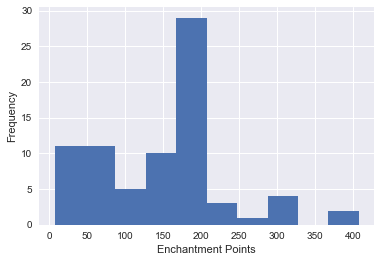

In [260]:
import seaborn as sns
sns.set()
EP = np.array(EP)
plt.hist(EP, bins=10)
plt.xlabel('Enchantment Points')
plt.ylabel('Frequency')
plt.show()

## Web Scraping##

In [283]:
import bs4 as bs
import urllib
import urllib.request
import time
#response = requests.get("https://raw.githubusercontent.com/Foundations-of-Applied-Mathematics/Data/master//WebScraping/large_banks_index.html")
#print(response.text)
#with open("C:/Users/Noah/Desktop/out.txt", mode='wb') as f:
#    f.write(response.content)

#small_soup = BeautifulSoup(response, 'html.parser')
#print(small_soup.prettify())


In [325]:
url = 'https://catalog.byu.edu/courses?page=0'
page = urllib.request.urlopen(url)
soup = bs.BeautifulSoup(page, 'html.parser')

In [326]:
stuff = [a.text for a in soup.find_all('a')[20:]]

In [327]:
stuff

['ACC 200  - Principles of Accounting',
 'ACC 201  - Principles of Financial Accounting',
 'ACC 202  - Principles of Managerial Accounting',
 'ACC 241  - Business Law in the Environment',
 'ACC 300  - Introduction to Accounting 2',
 'ACC 305  - Principles of Accounting 2',
 'ACC 310  - Principles of Accounting 2',
 'ACC 401  - Business and Accounting Information Systems',
 'ACC 402  - Cost and Managerial Accounting',
 'ACC 403  - Intermediate Financial Accounting 1',
 'ACC 404  - Financial Accounting 2',
 'ACC 405  - Fundamentals of Taxation',
 'ACC 406  - Financial Statement Auditing',
 'ACC 440  - Corporate Financial Reporting',
 'ACC 453  - Money, the Financial System, and the Economy',
 'ACC 503  - Advanced Financial Accounting',
 'ACC 515  - Accounting Research Seminar',
 'ACC 516  - Introduction to Academic Research',
 'ACC 517  - Academic Archival Research Design',
 'ACC 518  - Academic Experimental Research Design',
 'ACC 522  - Advanced Taxation',
 'ACC 523  - Tax Research Met

In [ ]:
#This is a for loop that scrapes the BYU webpage with different possible courses to take

#data__frame = pd.DataFrame() 
biglist = []
for i in range (0,58):
    url2 = "https://catalog.byu.edu/courses?page="+str(i)
    page2 = urllib.request.urlopen(url2)
    soup2 = bs.BeautifulSoup(page2, 'html.parser')
    stuff2 = [a.text for a in soup2.find_all('a')[20:]]
    for s in stuff2:
        biglist.append(s)
    #data__frame = data__frame.append(stuff2[0], ignore_index=True)
    #print(stuff2)
    time.sleep(.05)
print(biglist)

In [379]:
'''Right here I tried to parse out each element of the list, and then test to see if the 3 digit number is between 100 and 199.
However, some of the elemtents have the number as the 3rd string of the element, not the second. I tried to build a system that
would test for errors, and if there was an error then it would do the 3rd string not the 2nd, but my exceptions weren't working.

'''


for i in range(0,len(biglist)): 
    p=True
    if float(biglist[i].split()[1]):
        p=True
    except ValueError:
        p = False
    #if float(biglist[i].split()[1]) 
        
    
    if p ==True:
        if int(biglist[i].split()[1][:2]) <200 and int(biglist[5].split()[1][:2])>100:
        print(biglist[i])
    else:
        if int(biglist[i].split()[2][:2]) <200 and int(biglist[5].split()[2][:2])>100:
        print(biglist[i])
        

SyntaxError: invalid syntax (<ipython-input-379-654f1c4a0d6d>, line 5)

In [365]:
'''This is my second attempt to parse out data and sort by 100's by using regex. Was also going well until it found random
strings in the list of 3 digit numbers. All I wanted was a list of 100 level classes that I would be willing to take as a 
freshman. Didn't quite work either.

'''


import re
templist = []
for i in range (0,len(biglist)):
    templist.append(re.findall('\d{3}',biglist[i]))
print(templist)
print(templist[0])
for j in range(len(templist)):
    if templist[j]!=[]:
        print(templist[j])
        if float(templist[j][0])<200:
            #print(templist[j][0])
            templist[i] = biglist[i]
for k in templist:
    if len(templist[k])<6:
        templist.remove(templist[k])
print(templist)

[['200'], ['201'], ['202'], ['241'], ['300'], ['305'], ['310'], ['401'], ['402'], ['403'], ['404'], ['405'], ['406'], ['440'], ['453'], ['503'], ['515'], ['516'], ['517'], ['518'], ['522'], ['523'], ['525'], ['530'], ['531'], ['540'], ['541'], ['542'], ['545'], ['550'], ['555'], ['556'], ['557'], ['560'], ['561'], ['562'], ['563'], ['564'], ['565'], ['566'], ['568'], ['591'], ['599'], ['100'], ['101'], ['110'], ['111'], ['190'], ['200'], ['201'], ['210'], ['211'], ['300'], ['301'], ['305'], ['310'], ['311'], ['399'], ['400'], ['401'], ['410'], ['411'], ['100'], ['101'], ['102'], ['201'], ['202'], ['211'], ['305'], ['311'], ['321'], ['330'], ['340'], ['350'], ['100'], ['101'], ['102'], ['201'], ['202'], ['305'], ['321'], ['330'], ['340'], ['350'], ['100'], ['101'], ['102'], ['201'], ['202'], ['305'], ['321'], ['330'], ['340'], ['350'], ['100'], ['100'], ['101'], ['102'], ['111'], ['201'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],

['466']
['475']
['476']
['483', '431']
['485']
['487']
['490']
['493']
['521']
['522']
['523']
['528']
['541']
['542']
['543']
['548']
['549']
['550']
['551']
['555']
['560']
['562']
['563']
['564']
['568']
['576']
['595']
['203']
['213']
['323']
['324']
['330']
['332']
['333']
['340']
['343']
['344']
['345']
['400']
['440']
['442']
['443']
['445']
['446']
['447']
['493']
['496']
['589']
['589']
['589']
['589']
['589']
['589']
['589']
['589']
['589']
['589']
['589']
['589']
['589']
['589']
['589']
['589']
['589']
['589']
['589']
['589']
['589']
['589']
['589']
['589']
['199']
['231']
['295']
['480']
['497']
['595']
['198']
['201']
['201']
['202']
['211']
['212']
['218']
['220']
['230']
['232']
['235']
['236']
['238']
['251']
['268']
['276']
['291']
['292']
['293']
['294']
['295']
['300']
['305']
['306']
['310']
['311']
['311']
['312']
['312']
['313']
['314']
['315']
['315']
['316']
['316']
['317']
['318']
['319']
['320']
['321']
['322']
['323']
['324']
['325']
['326']
['327']
['328']
[

['590']
['598']
['100']
['101']
['102']
['201']
['202']
['305']
['321']
['330']
['340']
['350']
['100']
['101']
['120']
['220']
['221']
['223']
['225']
['226']
['227']
['290']
['292']
['300']
['301']
['301']
['320']
['390']
['391']
['395']
['398']
['499']
['300']
['326']
['391']
['401']
['402']
['411']
['412']
['413']
['490']
['540']
['110']
['396']
['396']
['399']
['480']
['480']
['490']
['494']
['100']
['101']
['102']
['201']
['211']
['305']
['321']
['330']
['340']
['350']
['101']
['102']
['201']
['202']
['211']
['311']
['399']
['429']
['100']
['101']
['102']
['201']
['202']
['305']
['321']
['330']
['340']
['350']
['100']
['101']
['102']
['201']
['202']
['305']
['321']
['330']
['340']
['350']
['100']
['101']
['102']
['201']
['202']
['305']
['321']
['330']
['340']
['350']
['100']
['101']
['102']
['201']
['202']
['305']
['321']
['330']
['340']
['350']
['130']
['131']
['132']
['133']
['210']
['214']
['230']
['231']
['233']
['330']
['331']
['338']
['339']
['340']
['341']
['388']
['399']


['466']
['470']
['472']
['473']
['474']
['475']
['476']
['497']
['498']
['499']
['539']
['579']
['599']
['599']
['101']
['102']
['105']
['201']
['202']
['205']
['206']
['211']
['212']
['311']
['321']
['322']
['323']
['325']
['326']
['339']
['345']
['346']
['355']
['356']
['377']
['395']
['399']
['414']
['419']
['437']
['438']
['439']
['441']
['442']
['449']
['451']
['452']
['453']
['459']
['461']
['462']
['477']
['480']
['491']
['493']
['520']
['521']
['522']
['529']
['599']
['101']
['111']
['111']
['170']
['200']
['210']
['212']
['220']
['240']
['270']
['306']
['307']
['308']
['309']
['310']
['311']
['320']
['321']
['322']
['330']
['338']
['341']
['342']
['343']
['345']
['348']
['349']
['350']
['352']
['353']
['354']
['356']
['358']
['359']
['361']
['365']
['370']
['375']
['377']
['381']
['382']
['387']
['388']
['390']
['399']
['410']
['420']
['430']
['492']
['495']
['496']
['499']
['501']
['502']
['503']
['504']
['505']
['510']
['511']
['512']
['513']
['513']
['520']
['531']
['540']


ValueError: could not convert string to float: 'S'

In [380]:
for i in range(0,58):
    url = "https://catalog.byu.edu/courses?page="+str(i)
    print(url)

https://catalog.byu.edu/courses?page=0
https://catalog.byu.edu/courses?page=1
https://catalog.byu.edu/courses?page=2
https://catalog.byu.edu/courses?page=3
https://catalog.byu.edu/courses?page=4
https://catalog.byu.edu/courses?page=5
https://catalog.byu.edu/courses?page=6
https://catalog.byu.edu/courses?page=7
https://catalog.byu.edu/courses?page=8
https://catalog.byu.edu/courses?page=9
https://catalog.byu.edu/courses?page=10
https://catalog.byu.edu/courses?page=11
https://catalog.byu.edu/courses?page=12
https://catalog.byu.edu/courses?page=13
https://catalog.byu.edu/courses?page=14
https://catalog.byu.edu/courses?page=15
https://catalog.byu.edu/courses?page=16
https://catalog.byu.edu/courses?page=17
https://catalog.byu.edu/courses?page=18
https://catalog.byu.edu/courses?page=19
https://catalog.byu.edu/courses?page=20
https://catalog.byu.edu/courses?page=21
https://catalog.byu.edu/courses?page=22
https://catalog.byu.edu/courses?page=23
https://catalog.byu.edu/courses?page=24
https://ca